In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

print("Running on PyMC3 v{}".format(pm.__version__))
print("Running on arviz v{}".format(az.__version__))


# pip uninstall arviz
# pip install arviz==0.8.3

Running on PyMC3 v5.7.2
Running on arviz v0.16.1


In [2]:
df1 = pd.read_csv('data_01.csv')
df2 = pd.read_csv('data_02.csv')
df3 = pd.read_csv('data_03.csv')
df4 = pd.read_csv('data_04.csv')
df5 = pd.read_csv('data_05.csv')
df6 = pd.read_csv('data_06.csv')
df1.head(5)

,x,y
0,13.344351,9.064982
1,12.141748,9.742935
2,16.045178,10.697097
3,9.044173,7.119905
4,16.597604,11.721995


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       55 non-null     float64
 1   y       55 non-null     float64
dtypes: float64(2)
memory usage: 1012.0 bytes


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       55 non-null     float64
 1   y       55 non-null     float64
dtypes: float64(2)
memory usage: 1012.0 bytes


In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       53 non-null     float64
 1   y       53 non-null     float64
dtypes: float64(2)
memory usage: 980.0 bytes


In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       47 non-null     float64
 1   y       47 non-null     float64
dtypes: float64(2)
memory usage: 884.0 bytes


In [8]:
from functools import reduce
dfs = [df1, df2, df3, df4, df5, df6]
df = pd.concat(dfs, axis=0).reset_index().drop('index', axis = 1)

df

,x,y
0,13.344351,9.064982
1,12.141748,9.742935
2,16.045178,10.697097
3,9.044173,7.119905
4,16.597604,11.721995
...,...,...
257,16.883676,11.708367
258,13.678907,8.130473
259,14.441869,10.134124
260,13.252132,8.762344


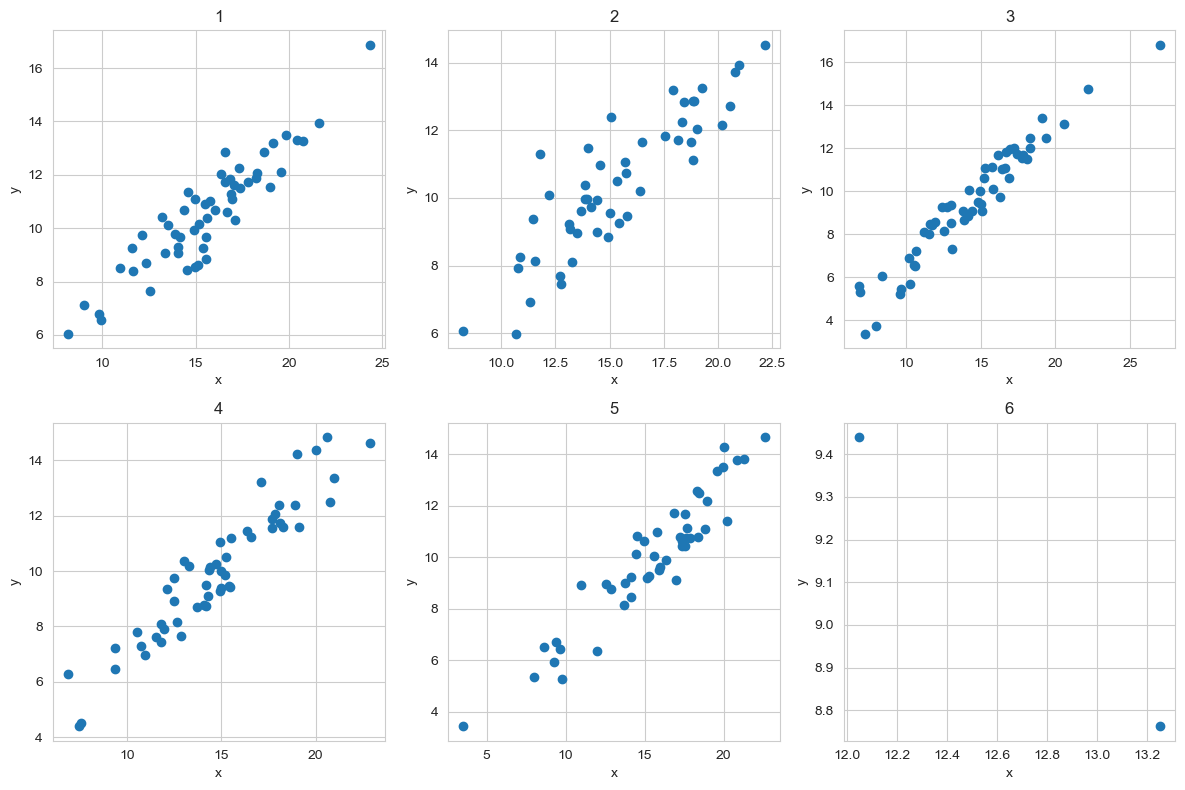

In [9]:
df = [df1, df2, df3, df4, df5, df6]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

for i, (df, ax) in enumerate(zip(df, axes)):
    x = np.array(df['x'])
    y = np.array(df['y'])
    ax.scatter(x, y)
    ax.set_title(f"{i+1}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plt.tight_layout()
plt.show()

In [10]:
x_m = np.array(df['x'])
y_m = np.array(df['y'])
M = 7
x_centered = x_m - x_m.mean()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [α_tmp, β, ε, ν]


Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 16 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


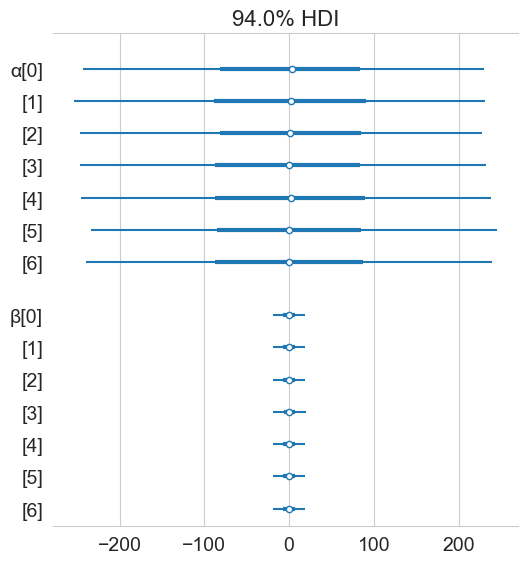

In [11]:
x_centered = x_m - x_m.mean()

with pm.Model() as unpooled_model:
    α_tmp = pm.Normal('α_tmp', mu=0, sigma=10, shape=M)
    β = pm.Normal('β', mu=0, sigma=10, shape=M)
    ε = pm.HalfCauchy('ε', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu= 0,
                         sigma=ε, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean())

    trace_up = pm.sample(2000)
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True);

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp[0],0.195,9.904,-18.502,18.784,0.089,0.146,12358.0,4400.0,1.0
α_tmp[1],0.119,9.811,-18.074,18.304,0.092,0.132,11463.0,4654.0,1.0
α_tmp[2],-0.157,9.731,-17.859,18.577,0.087,0.141,12492.0,4485.0,1.0
α_tmp[3],0.029,10.005,-18.101,19.155,0.090,0.144,12446.0,4306.0,1.0
α_tmp[4],-0.024,10.118,-19.059,18.905,0.087,0.149,13700.0,4633.0,1.0
α_tmp[5],0.001,9.761,-17.359,19.236,0.094,0.138,10831.0,4492.0,1.0
α_tmp[6],-0.000,10.031,-19.165,18.734,0.088,0.148,13145.0,4480.0,1.0
β[0],-0.124,9.912,-18.472,18.671,0.092,0.141,11462.0,3895.0,1.0
β[1],-0.065,10.255,-19.236,18.802,0.091,0.146,12827.0,4486.0,1.0
β[2],-0.038,9.932,-18.860,18.759,0.091,0.141,12067.0,4400.0,1.0


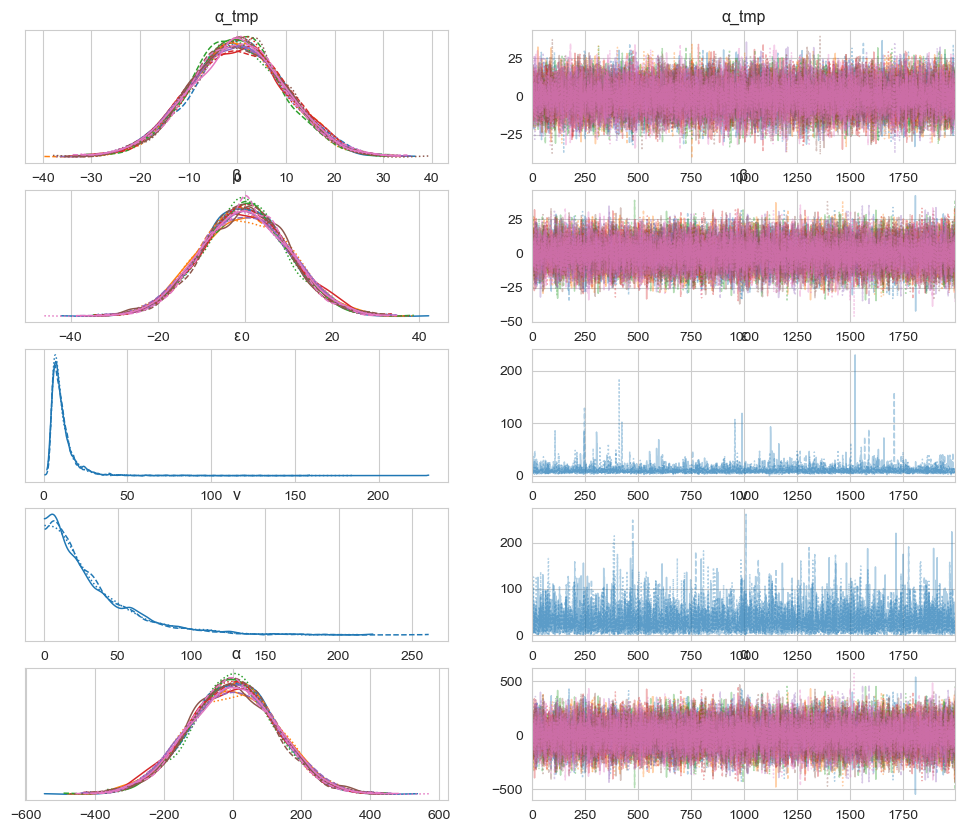

In [12]:
az.plot_trace(trace_up)
az.summary(trace_up)

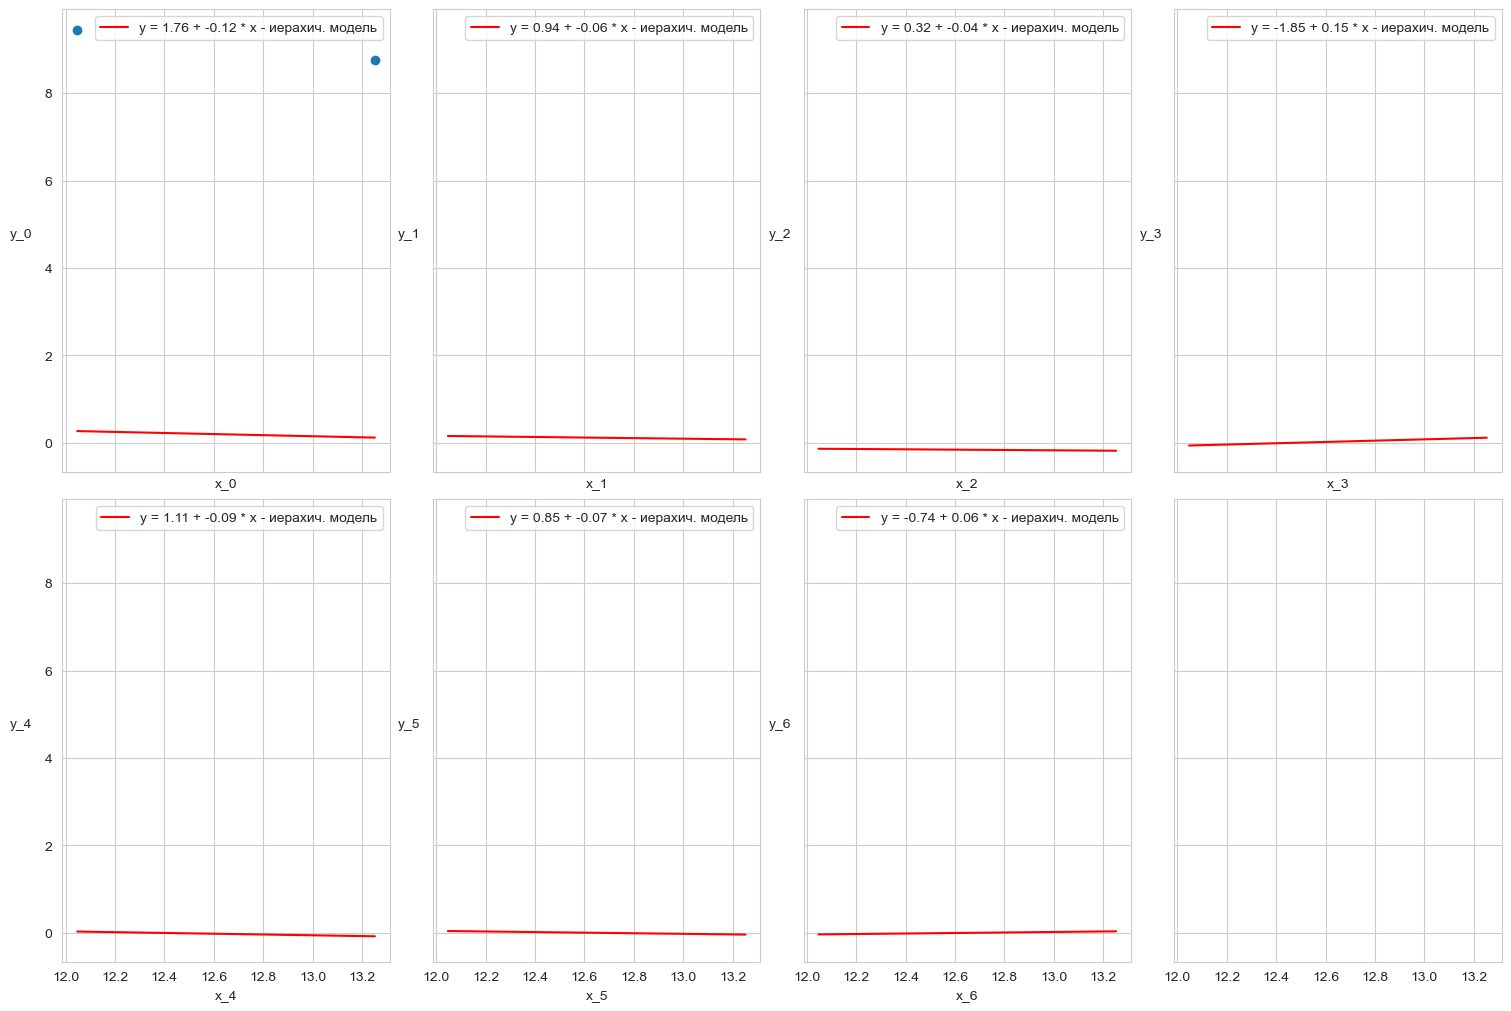

In [14]:
N = 47
_, ax = plt.subplots(2, 4, figsize=(15, 10), sharex=True, sharey=True,
                     constrained_layout=True)

#trace_hmm = trace_hm.posterior.stack(samples={"chain", "draw"})
trace_hmm = trace_up.posterior.stack(samples={"chain", "draw"})


ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)

for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hmm['α'].sel({'α_dim_0':i}).mean().item()
    beta_m  = trace_hmm['β'].sel({'β_dim_0':i}).mean().item()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='r',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x'+' - иерахич. модель')

    
    ax[i].legend()
    # plt.xlim(x_m.min()-1, x_m.max()+1)
    # plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

In [15]:
trace_up

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data